In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.warnings.filterwarnings('ignore')
from numpy import nan

In [2]:
df=pd.read_csv("heart_disease.csv")

In [3]:

df.drop(columns=["Unnamed: 14","Unnamed: 15"],axis=1,inplace=True)
df.head()
#sex is the classiffied in numbers as 1 for male and 0 for female 
# (the predicted attribute)is classified as he suffered heart attack as 
#age - age in years
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect



,(age),(sex),(cp),(trestbps),(chol),(fbs),(restecg),(thalach),(exang),(oldpeak),(slope),(ca),(thal),(num) (the predicted attribute)
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df["(age)"], range(30, 81, 10), right=False, labels=age_labels)

In [5]:
df.rename(columns={'(age)': 'Age', '(sex)': 'Gender','(num) (the predicted attribute)':"Heart_attack",'(chol)':'Cholestoral','(cp)':'Chest_pain'}, inplace=True)

In [6]:
df.head()

,Age,Gender,Chest_pain,(trestbps),Cholestoral,(fbs),(restecg),(thalach),(exang),(oldpeak),(slope),(ca),(thal),Heart_attack,age_group
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2,60-69
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0,40-49
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2,60-69
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1,50-59
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0,60-69


In [7]:
df.replace(to_replace ="?", 
                 value =nan,inplace=True) 
#replacing all "?" with nan


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           200 non-null    int64   
 1   Gender        200 non-null    int64   
 2   Chest_pain    200 non-null    int64   
 3   (trestbps)    144 non-null    object  
 4   Cholestoral   193 non-null    object  
 5   (fbs)         193 non-null    object  
 6   (restecg)     200 non-null    int64   
 7   (thalach)     147 non-null    object  
 8   (exang)       147 non-null    object  
 9    (oldpeak)    144 non-null    object  
 10   (slope)      98 non-null     object  
 11  (ca)          2 non-null      object  
 12   (thal)       34 non-null     object  
 13  Heart_attack  200 non-null    int64   
 14  age_group     200 non-null    category
dtypes: category(1), int64(5), object(9)
memory usage: 22.4+ KB


In [9]:
#dropping columns with less values as total value in each column is 200
df.drop(columns=["(ca)"],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           200 non-null    int64   
 1   Gender        200 non-null    int64   
 2   Chest_pain    200 non-null    int64   
 3   (trestbps)    144 non-null    object  
 4   Cholestoral   193 non-null    object  
 5   (fbs)         193 non-null    object  
 6   (restecg)     200 non-null    int64   
 7   (thalach)     147 non-null    object  
 8   (exang)       147 non-null    object  
 9    (oldpeak)    144 non-null    object  
 10   (slope)      98 non-null     object  
 11   (thal)       34 non-null     object  
 12  Heart_attack  200 non-null    int64   
 13  age_group     200 non-null    category
dtypes: category(1), int64(5), object(8)
memory usage: 20.8+ KB


In [11]:
#converting the object column to integer or float
columns=[" (oldpeak)","(thalach)","(trestbps)","Cholestoral","(exang)","(fbs)"," (slope)"," (thal)"]
for i in columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')

 Replacing missing value

In [12]:
#similarly doing it for "(chol)" as it has zero instead of nan
df["Cholestoral"].replace(to_replace=0,value=nan,inplace=True)

In [13]:
#creating a function with coninous values to replace median
columns=[" (oldpeak)","(thalach)","(trestbps)","Cholestoral"]
for i in columns:
    df[i]=df[i].fillna(df[i].median())




In [14]:
df[' (thal)'].value_counts()

7.0    22
6.0     8
3.0     4
Name:  (thal), dtype: int64

In [15]:
df['(fbs)'].value_counts()

0.0    125
1.0     68
Name: (fbs), dtype: int64

In [16]:
df['(exang)'].value_counts()

1.0    95
0.0    52
Name: (exang), dtype: int64

In [17]:
df[' (slope)'].value_counts()

2.0    53
3.0    29
1.0    16
Name:  (slope), dtype: int64

In [18]:
df['(exang)']=df['(exang)'].fillna(1)
df['(fbs)']=df['(fbs)'].fillna(0)
df[" (slope)"]=df[" (slope)"].fillna(2)
df[" (thal)"]=df[" (thal)"].fillna(7)

#replacing with the highest value

VISUALIZATION

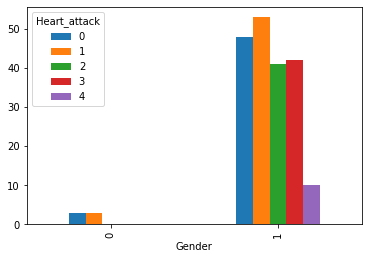

In [19]:
pd.crosstab(df.Gender,df.Heart_attack).plot(kind='bar')
#as per this graph maximux casess for heart_attack is for male 

In [20]:
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df["Age"], range(30, 81, 10), right=False, labels=age_labels)
#creating bins for age for visualization

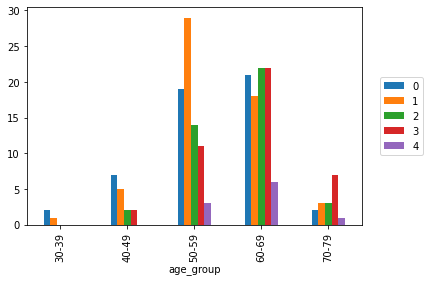

In [21]:
ax=pd.crosstab(df.age_group,df["Heart_attack"]).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

Observation

1. Dividing into bins and plotting ,we find that for the range 30-39 that presence of heart disease is very low

2. For the age group 40-49 also low but few cases of heart 

3. For the age group 50-59 we can see that there is a presence of heart disease which is not that severe .

4. For the age group 60-69 there is almost equal cases of 2 and 3 also there are few values =4 which means cases are there of severe heart disease

5. For the age group 70-79 there are very less cases of heart disease although highest for 3

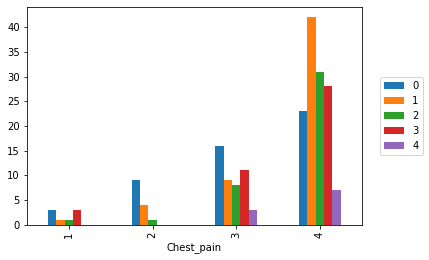

In [22]:

ax=pd.crosstab(df["Chest_pain"],df["Heart_attack"]).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

Value 1: typical angina,Value 2: atypical angina, Value 3: non-anginal pain -- Value 4: asymptomatic
  
 In the above we can see for value 4 which means asymptomatic the heart disease is very less however there are heart disease presence in case of 1 and 3


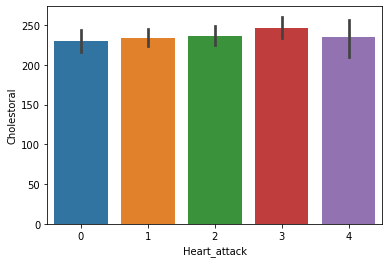

In [23]:

sns.barplot(x=df["Heart_attack"],y=df["Cholestoral"],data=df)
#we can drop this column as all the four has equal value

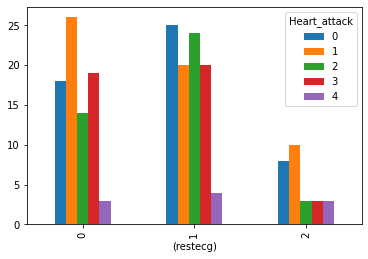

In [24]:
pd.crosstab(df["(restecg)"],df["Heart_attack"]).plot(kind='bar')


-  Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    In caseof normal the value of 1 is high which means heart disease may be present but ver less same for 1 and 2

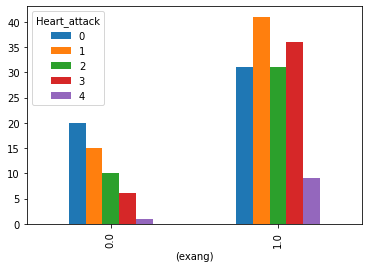

In [25]:
pd.crosstab(df["(exang)"],df["Heart_attack"]).plot(kind='bar')

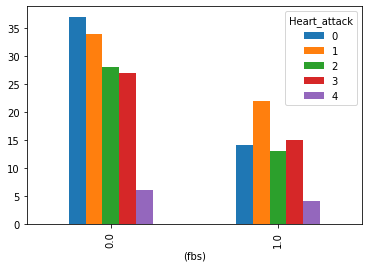

In [26]:
pd.crosstab(df["(fbs)"],df["Heart_attack"]).plot(kind='bar')
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false


We can see that for normal blood sugar the presnece of heart disease is less but in case  of high fbs we there are cases of heart disease

In [27]:
corr_matrix=df.corr()
corr_matrix["Heart_attack"].sort_values(ascending=False)
#finding correlation  with respect to heart attack//


Heart_attack    1.000000
 (oldpeak)      0.366526
Age             0.287289
(exang)         0.206541
Chest_pain      0.168210
Gender          0.147470
(trestbps)      0.145444
 (slope)        0.142072
Cholestoral     0.107266
 (thal)         0.080270
(fbs)           0.048940
(restecg)      -0.032800
(thalach)      -0.073072
Name: Heart_attack, dtype: float64

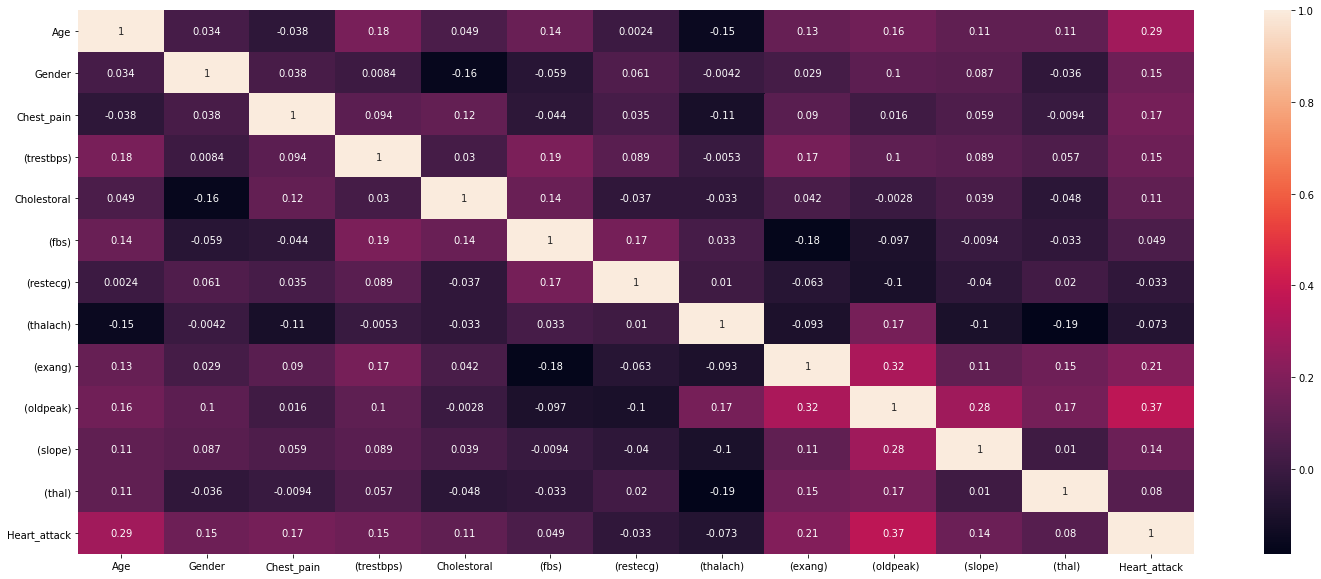

In [28]:
corr = df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

In [29]:
df.drop(columns=["age_group","(thalach)","(restecg)"," (thal)"],axis=1,inplace=True)
#Dropping columns with very low coorelation

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           200 non-null    int64  
 1   Gender        200 non-null    int64  
 2   Chest_pain    200 non-null    int64  
 3   (trestbps)    200 non-null    float64
 4   Cholestoral   200 non-null    float64
 5   (fbs)         200 non-null    float64
 6   (exang)       200 non-null    float64
 7    (oldpeak)    200 non-null    float64
 8    (slope)      200 non-null    float64
 9   Heart_attack  200 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 15.8 KB


In [31]:
df.skew()
#checking the skewness 

Age            -0.404091
Gender         -5.552105
Chest_pain     -1.648734
(trestbps)     -1.320144
Cholestoral     1.123096
(fbs)           0.680636
(exang)        -1.102593
 (oldpeak)      0.259052
 (slope)        0.210521
Heart_attack    0.297393
dtype: float64

In [32]:
#for treating skewed data
from sklearn.preprocessing import power_transform
df_skewed=power_transform(df,method="yeo-johnson")
df_new=pd.DataFrame(df_skewed,columns=df.columns)


In [33]:
df_new.skew()

Age             0.017837
Gender         -5.552105
Chest_pain     -0.771030
(trestbps)      0.324408
Cholestoral     0.013462
(fbs)           0.680636
(exang)        -1.102593
 (oldpeak)     -0.054503
 (slope)        0.066894
Heart_attack   -0.087303
dtype: float64

In [34]:

from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
print(np.where(z>3))

(array([ 28,  33,  51,  66,  72,  76,  79,  80,  82,  96,  97, 126, 128,
       131, 133, 137, 176, 190, 195, 196, 198], dtype=int64), array([4, 3, 1, 2, 2, 2, 1, 4, 4, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 4],
      dtype=int64))


In [35]:
df =df[(z < 3).all(axis=1)]


In [36]:
df.skew()

Age            -0.321555
Gender          0.000000
Chest_pain     -1.345464
(trestbps)      0.699213
Cholestoral     0.797883
(fbs)           0.786066
(exang)        -1.155832
 (oldpeak)      0.275720
 (slope)        0.223409
Heart_attack    0.260793
dtype: float64

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           200 non-null    float64
 1   Gender        200 non-null    float64
 2   Chest_pain    200 non-null    float64
 3   (trestbps)    200 non-null    float64
 4   Cholestoral   200 non-null    float64
 5   (fbs)         200 non-null    float64
 6   (exang)       200 non-null    float64
 7    (oldpeak)    200 non-null    float64
 8    (slope)      200 non-null    float64
 9   Heart_attack  200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


In [38]:
df_new=df_new.astype(int)
#converting all he columns into integer data type

# MODEL EVALUTION
It is a classification problem as we need to find that how severe is the heart disease if present on a scale of 1-4


In [39]:
df_x=df_new.drop(columns=["Heart_attack"],axis=1)
y=df_new["Heart_attack"]
#creating input and output dataframe

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
#scaling the input column

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 45,test_size=0.20)

In [43]:
model=[DecisionTreeClassifier(),svm.SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Score of",m,"is",m.score(x_test,y_test))
    print("Cross val score:",cross_val_score(m,x,y,cv=5,scoring="accuracy").mean())
    print("\n")

Score of DecisionTreeClassifier() is 0.55
Cross val score: 0.4749999999999999


Score of SVC() is 0.45
Cross val score: 0.51


Score of RandomForestClassifier() is 0.425
Cross val score: 0.465


Score of KNeighborsClassifier() is 0.45
Cross val score: 0.465




In [44]:
#using svc for further evalution
from sklearn.model_selection import GridSearchCV
model=svm.SVC(probability=True)
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(x,y)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction


Best Hyper Parameters:
 {'C': 8, 'kernel': 'rbf'}


In [45]:
#after grid search cv hyperparameter tuning
model=svm.SVC(random_state=42,C=10, kernel='rbf',probability=True)
model.fit(x, y)
pred=model.predict(x_test)
print("Accuracy for Random Forest on CV data: ",model.score(x_test,y_test))

Accuracy for Random Forest on CV data:  0.85


In [46]:
#printing the report
print("Confusion matrix \n",confusion_matrix(y_test,pred))
print("classification report \n",classification_report(y_test,pred))

Confusion matrix 
 [[11  0  0]
 [ 1 19  0]
 [ 0  5  4]]
classification report 
               precision    recall  f1-score   support

          -1       0.92      1.00      0.96        11
           0       0.79      0.95      0.86        20
           1       1.00      0.44      0.62         9

    accuracy                           0.85        40
   macro avg       0.90      0.80      0.81        40
weighted avg       0.87      0.85      0.83        40



In [47]:
df_output=pd.DataFrame(pred)
df_output.to_csv('Output.csv') 
#saving the output in csv 

In [48]:
import joblib
joblib.dump(model,"heart_attack.attrion")

['heart_attack.attrion']